# Product Sales analysis using Python

### Project by Manish Malik

In [1]:
import pandas as pd
import os

In [2]:
df = pd.read_csv(r'C:\Users\manis\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_April_2019.csv')
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Task1 : Merging 12 months of sales data into a single csv file.

In [3]:
files = [file for file in os.listdir(r'C:\Users\manis\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
all_months_data = pd.DataFrame()  #creating an empty dataframe 
for file in files: 
    df = pd.read_csv(r'C:\Users\manis\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])  # merging all files to the empty dataframe
all_months_data.to_csv('all_data.csv', index = False)

#### Reading an updated dataframe

In [5]:
all_data = pd.read_csv('all_data.csv')
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Problem 1- What was the best month for sales? How much was earned that months?

#### Task2: Add "Month" column 

In [6]:
non_df = all_data[all_data.isna().any(axis = 1)]
non_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
all_data = all_data.dropna(how = 'all') # dropping all the Null values 
all_data['Month'] = all_data['Order Date'].str[0:2]   # Get the first two characters that represent the month
all_data['Month'] = all_data['Month'].astype('int32') # turning the data from string to integer.

ValueError: invalid literal for int() with base 10: 'Or'

#### we have 'or' values in our data we will clean that first then we will be adding the month column 

In [8]:
# this is the cleaned data with no inconsistent values 
all_data = all_data[~(all_data['Order Date'].str[0:2] == 'Or')] 


# gets the first two characters which represent month in the 'Order Date'
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()


# converting the 'Quantity Ordered' and 'Price Each' to the numeric data type
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


# Adding the 'Sales' column to the table
all_data['Sales'] = all_data['Quantity Ordered']* all_data['Price Each'] 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [9]:
#Answer to the first problem we will use the groupby method
Monthly_sale = all_data.groupby('Month')[['Quantity Ordered', 'Price Each', 'Sales']].sum()
Monthly_sale

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [10]:
import matplotlib.pyplot as plt 

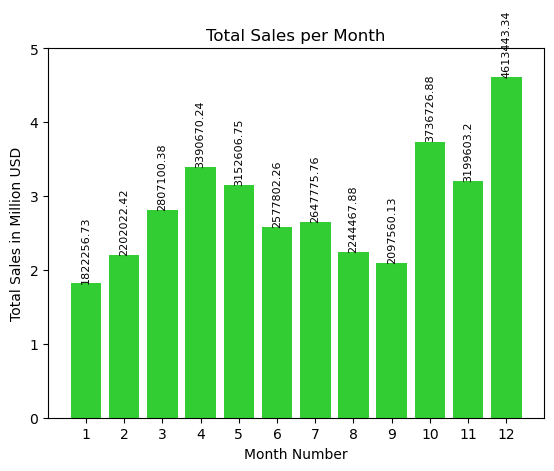

In [11]:
month = range(1, 13)
sales_sum = all_data.groupby('Month')['Sales'].sum()
plt.bar(month, sales_sum, color= 'limegreen')
for i, sales in enumerate(sales_sum):
    plt.text(month[i], sales, str(round(sales, 2)), ha='center', va='bottom', rotation = 90, fontsize = 8) 
#ha = horizontal alignment, va = vertical alignment

labels, location = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.xticks(range(1, 13))

plt.xlabel('Month Number')
plt.ylabel('Total Sales in Million USD')
plt.title('Total Sales per Month')
plt.show()\
# now we can see both highest and the lowest sales just by looking at it for few seconds.

## Problem 2 - What City sold the most product?

In [12]:
# We will create the city column
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
    
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [13]:
result = all_data.groupby('City')[['Quantity Ordered', 'Sales']].sum()
result

,Quantity Ordered,Sales
City,,
Atlanta GA,16602,2795498.58
Austin TX,11153,1819581.75
Boston MA,22528,3661642.01
Dallas TX,16730,2767975.40
Los Angeles CA,33289,5452570.80
New York City NY,27932,4664317.43
Portland ME,2750,449758.27
Portland OR,11303,1870732.34
San Francisco CA,50239,8262203.91


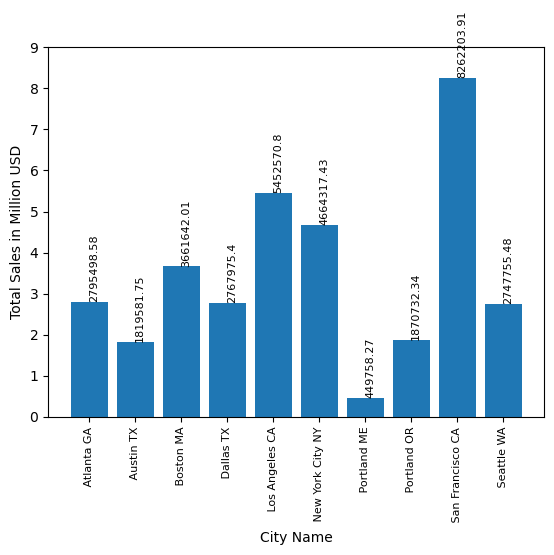

In [14]:
# We will visualize this data for the better understanding of the numbers 
City = [city for city, df in all_data.groupby('City')]
plt.bar(City, result['Sales'])

# to makes yticks into millions 
labels, location = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))

plt.xticks(City, rotation = 90, fontsize = 8)

# to visualize the numbers over each bar
for i, sales in enumerate(result['Sales']):
    plt.text(City[i], sales, str(round(sales, 2)), rotation= 90, va='bottom', fontsize = 8)


plt.ylabel('Total Sales in Million USD')
plt.xlabel('City Name')
plt.show()

### Problem 3- What time should we display advertisements to maximize likelihood <br> of Customer's buying products?

In [15]:
# for that we will create a new column 'Order_Date_DTO', convertin gthe 'Order Date' into date-time object
all_data['Order_Date_DTO'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')

# Extraction of the hours data
all_data['Hours'] = all_data['Order_Date_DTO'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order_Date_DTO,Hours
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,2019-04-19 08:46:00,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,2019-04-07 22:30:00,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,2019-04-12 14:38:00,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-12 14:38:00,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-30 09:27:00,9


In [16]:
# counting the sales order by hours
result3 = all_data.groupby('Hours').count()
result3.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order_Date_DTO
Hours,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854


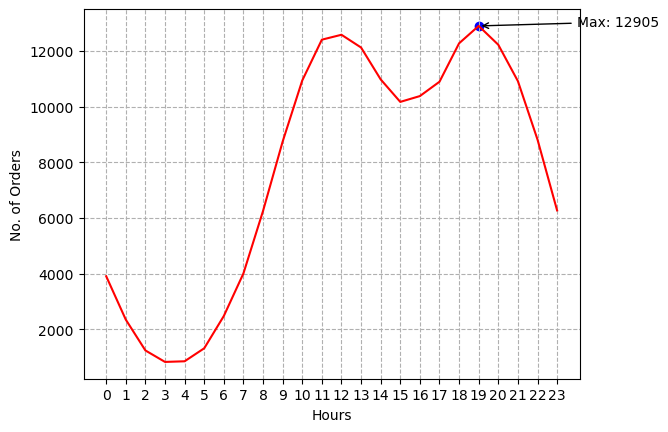

In [17]:
# Plotting
result3 = all_data.groupby('Hours')['Quantity Ordered'].count()
hours = [hour for hour, df in all_data.groupby('Hours')]
plt.plot(hours, result3, color= 'red')

# Find the index of the maximum value in result3
max_index = result3.idxmax()
max_value = result3.max()

# Annotate the highest point with the maximum value
plt.annotate(f'Max: {max_value}', xy=(max_index, max_value), xytext=(max_index +5, max_value ), 
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.scatter(max_index, max_value, color='blue')

plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('No. of Orders')
plt.grid(linestyle = '--')
plt.show()

# Best time to advertise is right before the 12PM and 7PM.

## Problem 4- What Products are most often sold together?

In [18]:
# we can find the duplicated order ID to figure out what items have been ordered together
new_all = all_data[all_data['Order ID'].duplicated(keep = False)]

# joining all products with the same Order ID in the same line.
new_all['Product Bundle'] = new_all.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

# dropping the duplicate values 
new_all = new_all[['Order ID', 'Product Bundle']].drop_duplicates()
new_all.head()

C:\Users\manis\AppData\Local\Temp\ipykernel_2212\1961232344.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_all['Product Bundle'] = new_all.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


,Order ID,Product Bundle
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [19]:
# Counting the products
from itertools import combinations
from collections import Counter

count = Counter()

for row in new_all['Product Bundle']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) # Counting all the 2 products bundle
    # count.update(Counter(combinations(row_list, 3))) # Counting all the 3 products bundle
count.most_common(5)

# We could offer the smart deal to the customer that buy iPhone by recommending the chaging cable with discount.


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361)]

## Problem 5- What product sold the most? Why do you think it did?

In [20]:
product_group = all_data.groupby('Product')['Quantity Ordered'].sum()
product_group.head()

Product
20in Monitor               4129
27in 4K Gaming Monitor     6244
27in FHD Monitor           7550
34in Ultrawide Monitor     6199
AA Batteries (4-pack)     27635
Name: Quantity Ordered, dtype: int64

C:\Users\manis\AppData\Local\Temp\ipykernel_2212\1765897086.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, quantity_ordered[i], str(quantity_ordered[i]), fontsize = 8,


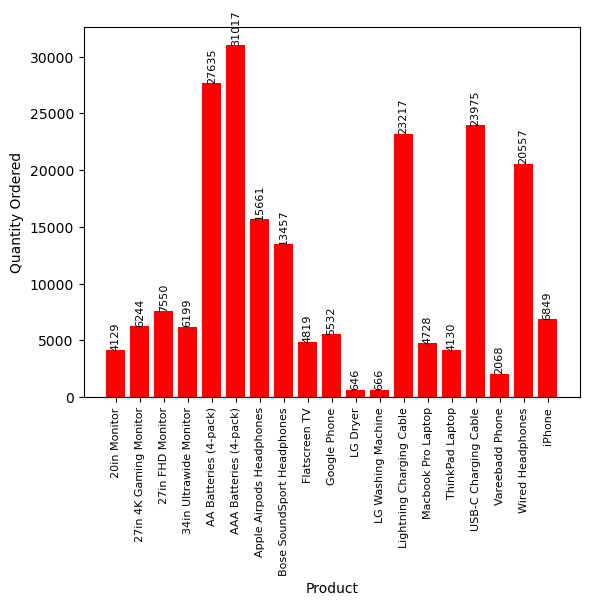

In [37]:
# Visualizing the product sales
quantity_ordered = all_data.groupby('Product')['Quantity Ordered'].sum()
products = [product for product, df in all_data.groupby('Product')]

plt.bar(products, quantity_ordered, color = 'red')
for i in range(len(products)):
    plt.text(i, quantity_ordered[i], str(quantity_ordered[i]), fontsize = 8,
             va = 'bottom', ha = 'center', rotation = 90)

plt.xticks(rotation = 90, fontsize = 8)

plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

C:\Users\manis\AppData\Local\Temp\ipykernel_2212\3275171953.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation = 90, fontsize = 8)


Text(0, 0.5, 'Prices')

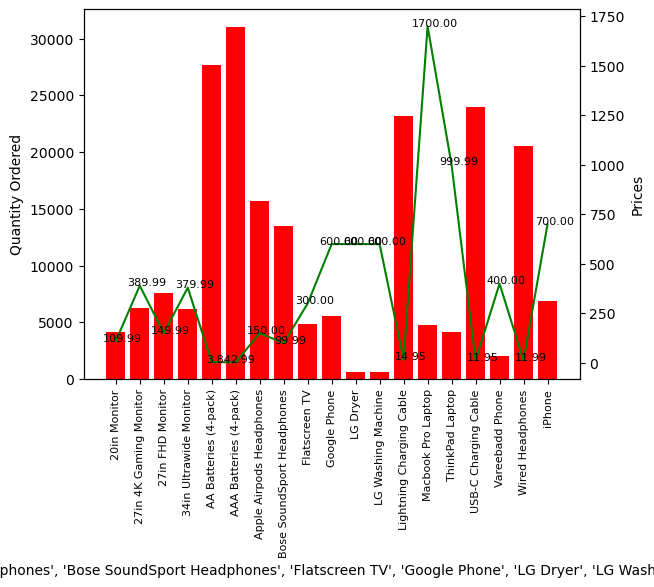

In [47]:
prices = all_data.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'red')

ax2.plot(products, prices, "g-")
for i, price in enumerate(prices):
    ax2.annotate('{:.2f}'.format(price), (products[i], price), xytext=(5, 0), 
                 textcoords='offset points', ha='center', fontsize=8)

ax1.set_xticklabels(products, rotation = 90, fontsize = 8)

ax1.set_xlabel(products)
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Prices')

# the sale for the AA and AAA 4 pack batteries with quantities sold 27635 and 31017
# is highest due to their cheaper prices.